# (FordGoBike Data Explanatory Analysis)
## by (Namratha J)

## Investigation Overview

> Ford GoBike(formerly known as Bay Wheels) is a general public bicycle sharing system in California's San Fransisco Bay Area. 
Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. The investigation primarily focusses on the various characteristics and patterns that the features show which makes this sharing system up and running for the entire month of February 2019.


## Dataset Overview

>The bicycles are available 24 hours a day, seven days a week for periods ranging from a single ride (up to 30 minutes) to a day pass, in 30-minute increments, or customers can purchase an annual subscription which gives them unlimited rides up to 45-minutes in duration, thus catering to all people at all times.
The dataset given here consists of the data of such people using their services for February 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [10]:
# load in the dataset into a pandas dataframe and perform all the data type conversions required
bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_data['start_time'] = pd.to_datetime(bike_data['start_time'])
bike_data['end_time'] = pd.to_datetime(bike_data['end_time'])
bike_data['start_station_id'] = bike_data['start_station_id'].astype('str')
bike_data['end_station_id'] = bike_data['end_station_id'].astype('str')
bike_data['bike_id'] = bike_data['bike_id'].astype('str')
bike_data['user_type'] = bike_data['user_type'].astype('category')
bike_data['member_gender'] = bike_data['member_gender'].astype('category')

bike_data['hourofday'] = bike_data.start_time.dt.strftime('%H')
bike_data['dayofweek'] = bike_data.start_time.dt.strftime('%A')
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
bike_data['dayofweek'] = bike_data['dayofweek'].astype(weekdaycat)

from datetime import date

def calculateAge(x): 
    today = date.today() 
    age = today.year - x
    return age 

bike_data['member_age'] = bike_data['member_birth_year'].apply(lambda x : calculateAge(x))
bike_data['duration_minute'] = bike_data['duration_sec'] / 60

bike_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 20 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183412 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183412 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null object
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null object
hourofday                  183412 non-null object
dayofweek      

## (Visualization 1)

> Member ages mostly fall between 25 and 40. The older population being Subscribers mostly travel during weekdays and younger being Customers travel more on weekends.

In [4]:
base_color = sb.color_palette()[0]


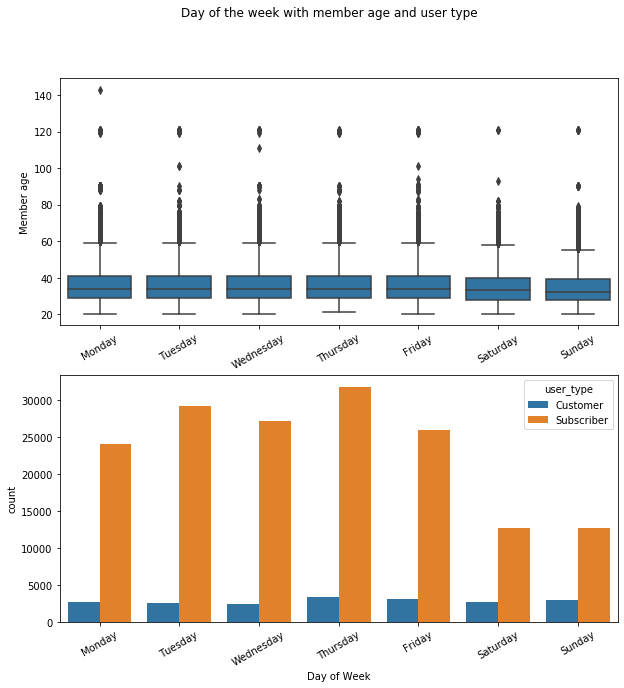

In [21]:

plt.figure(figsize = [10,10])
plt.suptitle('Day of the week with member age and user type');

plt.subplot(2, 1, 1)
sb.boxplot(data=bike_data, x='dayofweek', y='member_age', color=base_color);
plt.xlabel('Day of Week');
plt.xticks(rotation = 30)
plt.ylabel('Member age');

plt.subplot(2, 1, 2)
sb.countplot(data=bike_data, x='dayofweek', hue ='user_type',);
plt.xlabel('Day of Week');
plt.xticks(rotation = 30);



## (Visualization 2)

> Subscribers have weekday short trips whereas the Customers have long weekend trips.Subscriber riding is pretty consistent over the weekdays and weekends. Customer's usage is inconsistent and significantly increase during the weekends.

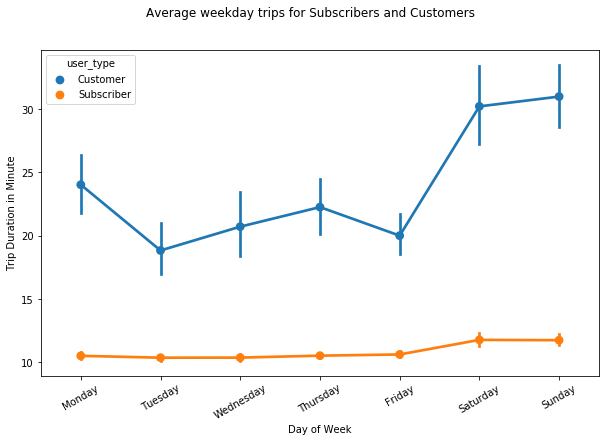

In [15]:
plt.figure(figsize = [10,6])
sb.pointplot(data=bike_data , x='dayofweek', y='duration_minute', hue='user_type');
plt.xlabel('Day of Week');
plt.xticks(rotation = 30)
plt.ylabel('Trip Duration in Minute');
plt.suptitle('Average weekday trips for Subscribers and Customers');

## (Visualization 3)
Subscribers are working professionals who commute mostly during working hours of 8 am and 5pm on the weekdays.
Consumers are leisure riders who travel more during weekends.


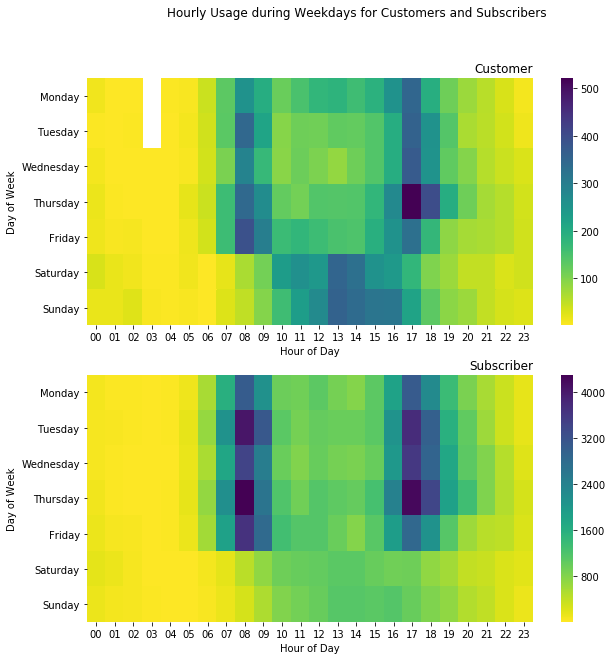

In [7]:
plt.figure(figsize = [10,10])
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

plt.subplot(2, 1, 1)
customers = bike_data.query('user_type == "Customer"')
ct_counts = customers.groupby(['dayofweek', 'hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='dayofweek', columns='hourofday', values='count')
sb.heatmap(ct_counts, cmap='viridis_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = bike_data.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['dayofweek', 'hourofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='dayofweek', columns='hourofday', values='count')
sb.heatmap(st_counts, cmap='viridis_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

### Summary:
    
    Each of these visualizations convey the similar message but are divided into different sets to differentiate and combine the cnclusions drawn and thereby relate and map the outcomes with one another to arrive at a common conclusion of:
     More subscribers use the bike sharing system than customers. Having different necessites, different usage patterns and riding habits are observed between the two user types. Subscribers used the system consistently on work days around 8-9am and 5-6pm for work commute, whereas customers rode a lot over weekends for leisure/casual purposes. 